## Time Series Analysis - Employment Dataset

Author: Khushee Kapoor

Last Updated: 20/12/2021

Week: 5

**Meta-Data** of the Employment Dataset:

The dataset contains month-wise unemployment rate in each industry.

First, we import the libraries:

*   NumPy - for data manipulation.
*   Pandas - for data manipulation.
*   MatPlotLib - for data visualization.
*   Seaborn - for data visualization.

In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

#### **Q1** Convert datestamp column to a datetime object and Set the datestamp columns as the index of your DataFrame. Check if there are missing values in each column.

To solve Question 1, we read the dataset into a Pandas dataframe. To do that, we use the read_csv() function from the Pandas library, and set the parameters parse_dates=True and index_col=datestamp, to convert and set the datestamp column as the index of the dataframe.

In [2]:
# reading the dataset
df = pd.read_csv('employment.csv', parse_dates=True, index_col='datestamp')

Following that, we view the first few rows of the dataframe using the head() function from the Pandas library.

In [3]:
# viewing the first five rows of the dataframe
df.head()

,Agriculture,Business services,Construction,Durable goods manufacturing,Education and Health,Finance,Government,Information,Leisure and hospitality,Manufacturing,Mining and Extraction,Nondurable goods manufacturing,Other,Self-employed,Transportation and Utilities,Wholesale and Retail Trade
datestamp,,,,,,,,,,,,,,,,
2000-01-01,10.3,5.7,9.7,3.2,2.3,2.7,2.1,3.4,7.5,3.6,3.9,4.4,4.9,2.3,4.3,5.0
2000-02-01,11.5,5.2,10.6,2.9,2.2,2.8,2.0,2.9,7.5,3.4,5.5,4.2,4.1,2.5,4.0,5.2
2000-03-01,10.4,5.4,8.7,2.8,2.5,2.6,1.5,3.6,7.4,3.6,3.7,5.1,4.3,2.0,3.5,5.1
2000-04-01,8.9,4.5,5.8,3.4,2.1,2.3,1.3,2.4,6.1,3.7,4.1,4.0,4.2,2.0,3.4,4.1
2000-05-01,5.1,4.7,5.0,3.4,2.7,2.2,1.9,3.5,6.2,3.4,5.3,3.6,4.5,1.9,3.4,4.3


To check for null values, we use the isnull() function from the Pandas library and sum() over each column.

In [4]:
# checking for missing values
df.isnull().sum()

Agriculture                       0
Business services                 0
Construction                      0
Durable goods manufacturing       0
Education and Health              0
Finance                           0
Government                        0
Information                       0
Leisure and hospitality           0
Manufacturing                     0
Mining and Extraction             0
Nondurable goods manufacturing    0
Other                             0
Self-employed                     0
Transportation and Utilities      0
Wholesale and Retail Trade        0
dtype: int64

As we can see, there are no missing values in the dataframe.

#### **Q2** Generate a boxplot to find the distribution of unemployment rate for every industry.

To solve Question 2, we use the boxplot() function from the Seaborn library and use MatPlotLib functions to give the plot an aesthetic appeal.

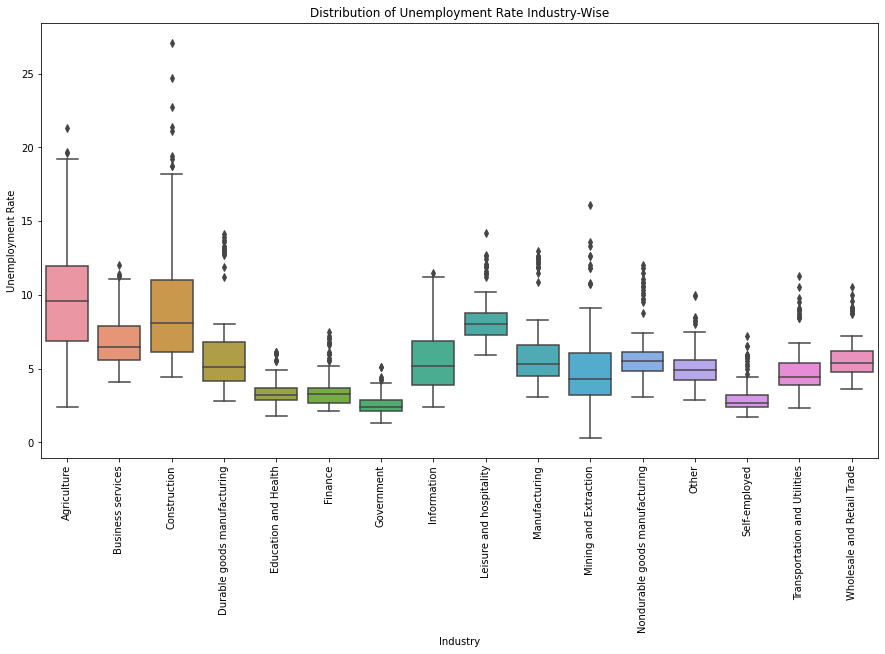

In [5]:
# generating a boxplot to find the distribution of unemployment rate for every industry
plt.figure(figsize = (15,8))
ax = sns.boxplot(data = df)
ax.set_title('Distribution of Unemployment Rate Industry-Wise')
plt.xticks(rotation=90)
ax.set_xlabel('Industry')
ax.set_ylabel('Unemployment Rate')
plt.show()

As we can see, the industry:

*   Agriculture - has a wide, right skewed distribution with outliers.
*   Business services - has a wide, slightly right skewed distribution with outliers.
*   Construction - has a wide, right skewed distribution with outliers.
*   Durable goods manufacturing - has a wide, right skewed distribution with outliers.
*   Education and Health - has a narrow, right skewed distribution with outliers.
*   Finance - has a narrow, right skewed distribution with outliers.
*   Government - has a narrow, right skewed distribution with outliers.
*   Information - has a wide, right skewed distribution with outliers.
*   Leisure and hospitality - has a narrow, right skewed distribution with outliers.
*   Manufacturing - has a wide, right skewed distribution with outliers.
*   Mining and Extraction - has a wide, right skewed distribution with outliers.
*   Nondurable goods manufacturing - has a narrow, right skewed distribution with outliers.
*   Other - has a narrow, right skewed distribution with outliers.
*   Self-employed - has a narrow, right skewed distribution with outliers.
*   Transporation and utilities - has a narrow, right skewed distribution with outliers.
*   Wholesale and retail trade - has a narrow, right skewed distribution with outliers.

#### **Q3.** Using line chart Visualize the unemployment rate of workers by industry .

To solve Question 3, we use the plot() function from the Pandas library and set the subplots parameter to True to make the plots industry wise, and use MatPlotLib functions to give the plot an aesthetic appeal.

Text(0, 0.5, 'Unemployment Rate')

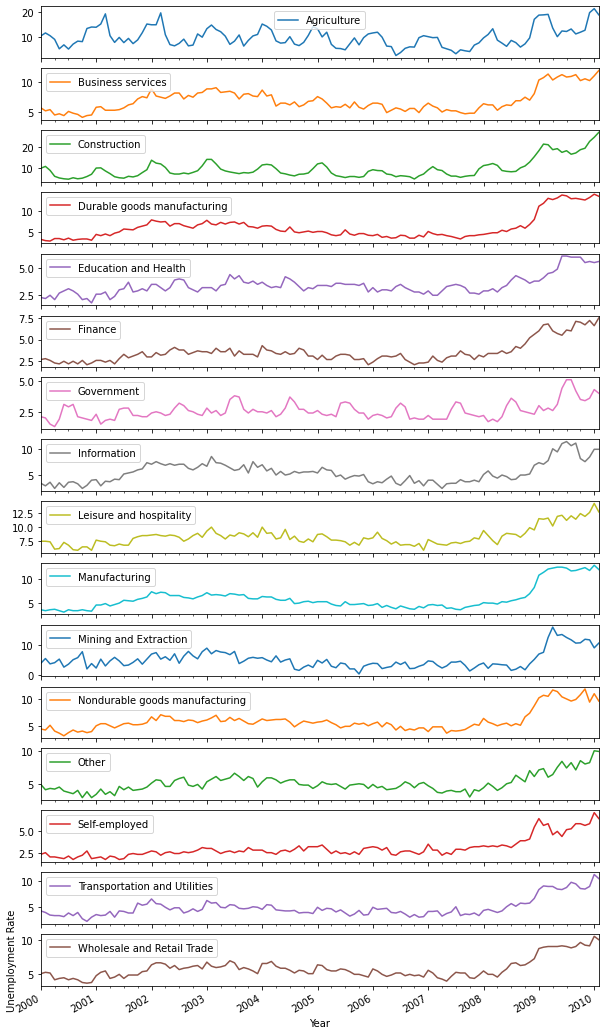

In [6]:
# generating industry wise line plots
lc = df.plot(subplots=True, figsize=(10, 20))
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')

As we can see, there is a yearly seasonal component in the unemployment rate of all of the industries, and the general trend is observed to go up from 2008 onwards.

#### **Q4.** Plot the monthly and yearly trends.

To plot yearly trends, we first group the dataframe by year and find the yearly mean. Then, we plot the means using the plot() function from the Pandas library.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


Text(0, 0.5, 'Unemployment Rate')

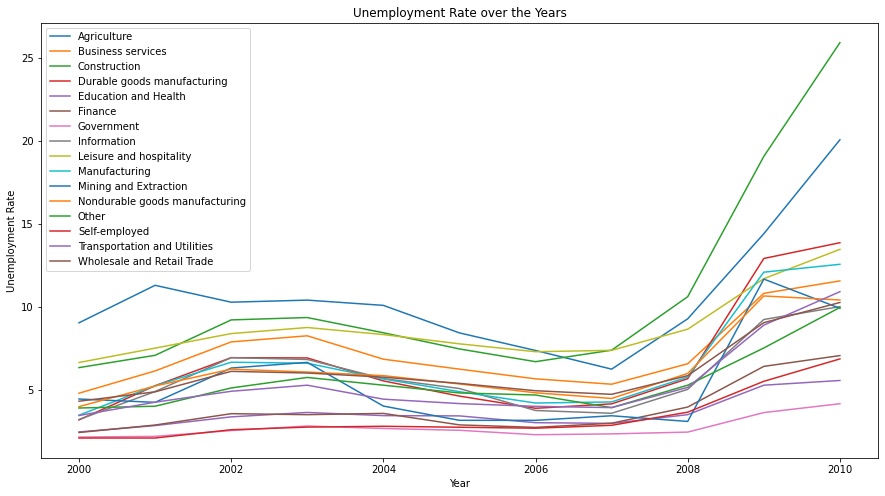

In [7]:
# grouping the dataframe year wise and calculating the mean
df.index_year = df.index.year
df_year = df.groupby(df.index_year).mean()

# plotting a line graph to represent yearly mean
df_year.plot(figsize=(15,8))
plt.title('Unemployment Rate over the Years')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')

As we can see, the unemployment rate increased slightly in all the industries between 2002 and 2004 and then decreased between 2004 and 2008. Then, there was a big jump in the unemployment rate from 2008 onwards. This could be due to the Great Recession.

To plot monthly trends, we first group the dataframe by month and find the monthly mean. Then, we plot the means using the plot() function from the Pandas library.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


Text(0, 0.5, 'Unemployment Rate')

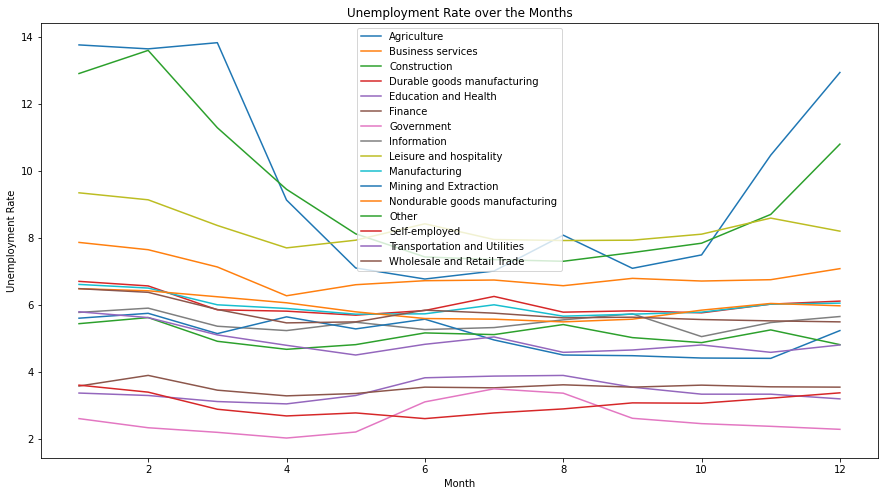

In [8]:
# grouping the dataframe month wise and calculating the mean
df.index_month = df.index.month
df_month = df.groupby(df.index_month).mean()

# plotting a line graph to represent monthly mean
df_month.plot(figsize=(15,8))
plt.title('Unemployment Rate over the Months')
plt.xlabel('Month')
plt.ylabel('Unemployment Rate')

As we can see, the unemployment rate for all the industries except Agriculture and Construction has been more or less constant. For the above mentioned industries, the unemployment rate took a big dip and then again spiked.

#### **Q5.** Apply time series decomposition to your dataset to visualize the trend and seasonality.

To solve Question 5, we import the statsmodels api to decompose the trend and seasonality in the time series dataframe.

In [9]:
# importing statsmodels.api
import statsmodels.api as sm

jobs_decomp = {}

jobs_names = df.columns

# decomposing the trend and seasonality
for ts in jobs_names:
  ts_decomposition = sm.tsa.seasonal_decompose(df[ts])
  jobs_decomp[ts] = ts_decomposition

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Next, we create dataframe to store the trends of all the industries and plot it using the plot() function from the Pandas library.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f599b18d210>,
      dtype=object)

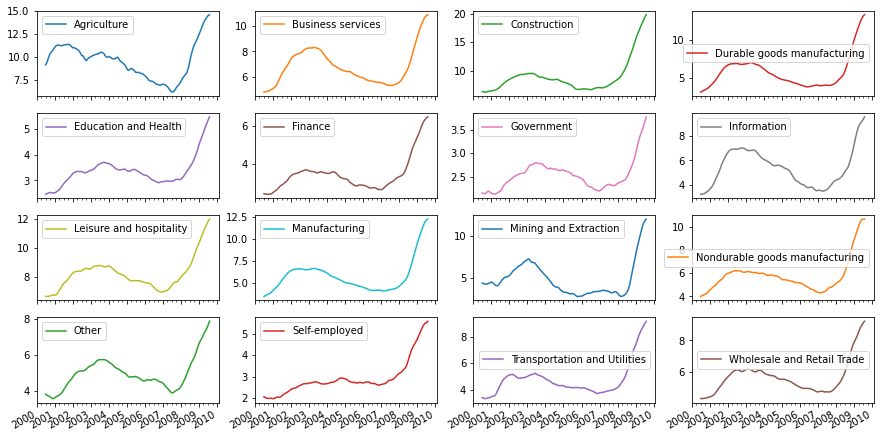

In [10]:
jobs_trend = {}

# storing the trend industry-wise
for ts in jobs_names:
  jobs_trend[ts] = jobs_decomp[ts].trend

# converting to dataframe
trend_df = pd.DataFrame.from_dict(jobs_trend)

trend_df.index.name = None

# plotting the dataframe
trend_df.plot(subplots=True,
              layout=(4,4),
              figsize=(15,8))

As we can see, the unemployment rate first increases, then descreases and then spikes in all the industries. As previously stated, this could be due to the Great Recession.

Next, we create dataframe to store the seasonality of all the industries and plot it using the plot() function from the Pandas library.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f599a543e50>,
      dtype=object)

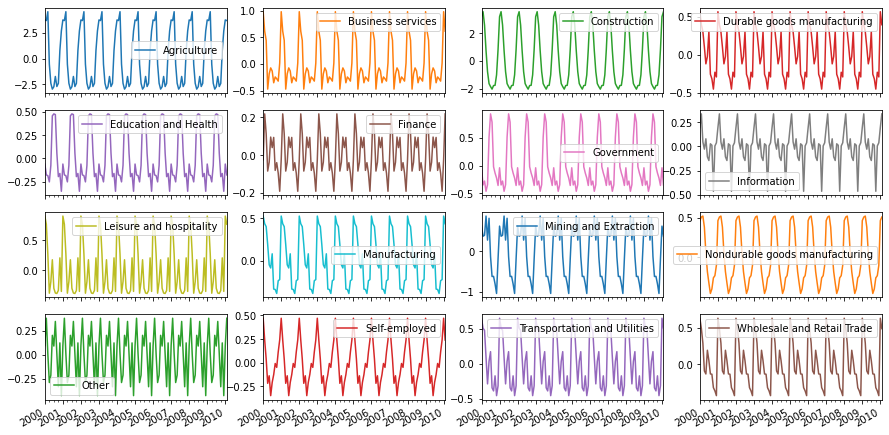

In [11]:
jobs_seasonal = {}

# storing the seasonality industry-wise
for ts in jobs_names:
  jobs_seasonal[ts] = jobs_decomp[ts].seasonal

# converting to dataframe
seasonal_df = pd.DataFrame.from_dict(jobs_seasonal)

seasonal_df.index.name = None

# plotting the dataframe
seasonal_df.plot(subplots=True,
              layout=(4,4),
              figsize=(15,8))

As we can see, there is a yearly seasonal component of unemployment in all the industries. 

#### **Q6.** Visualize the seasonality of Agriculture, Health and Finance sector.

To solve Question 6, we plot the Agriculture, Health and Finance column from the seasonal dataframe using the plot() function from the Pandas library.

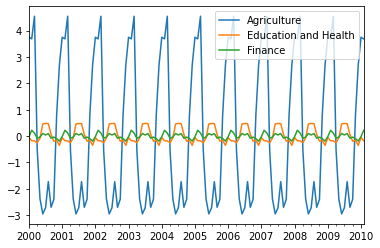

In [12]:
# plotting the seasonal component of the Agriculture, Health and Finance industries
seasonal_df[['Agriculture', 'Education and Health', 'Finance']].plot()

As we can see, there is a yearly seasonal component in all the three industries. However, the seasonal component of the Agriculture industry is more pronounced. This means that the unemployemnt rate varies a lot during the year in the Agriculture industry.

#### **Q7.** Visualize the seasonality of multiple time series and the correlation between each time series in the dataset.

To solve Question 7, we first plot the seasonal component of the columns using the plot() function from the Pandas library.

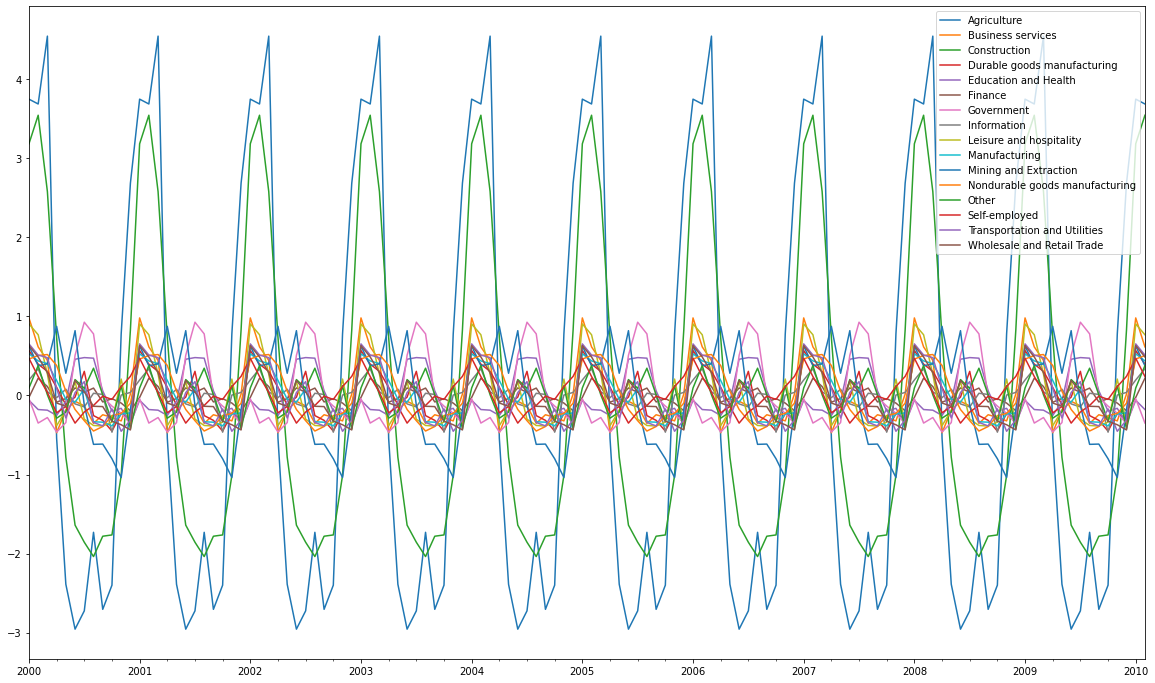

In [13]:
# plotting the seasonal component of the columns
seasonal_df.plot(figsize=(20, 12))

As we can see, there is a seasonal component in the unemployment rates of all the indsutries. However, the seasonal component of the Agriculture and Construction industries is more pronounced. This means that the unemployment rate varies a lot over the year.

Next, we plot a heatmap of the correlation between the unemployment rates of the industries. To do this, we use the corr() function from the Pandas library and the heatmap() function from the Seaborn library.

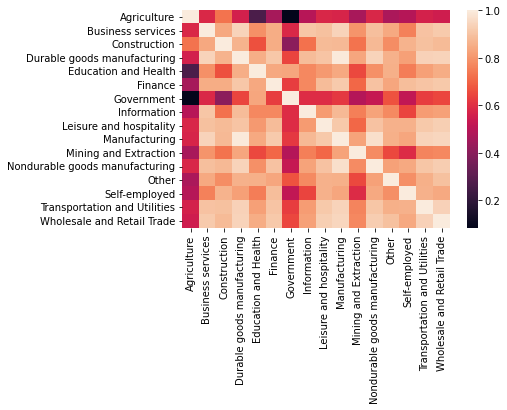

In [14]:
# plotting the correlation between the unemployment rate in every industry
sns.heatmap(df.corr())

As we can see, except the Agriculture and Government industries, the unemployment rate in every indsutry is highly correlated with each other. This is indicative of a domino-effect - if the unemployment rate in one indsutry increases, then it increases the unemployment rate of all the other industries.